(<Figure size 420x280 with 1 Axes>, <AxesSubplot:>)

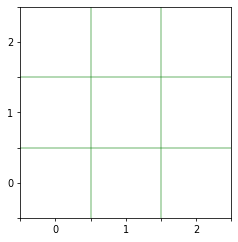

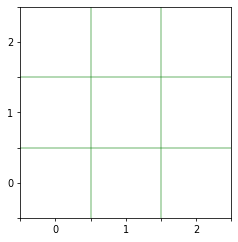

In [290]:

def draw_field(x=0, y=0, size=3):
    LINE_WIDTH = 2
    DPI = 70
    ALPHA = 0.3

    f, ax = plt.subplots(1, 1)
    ax.set_ylim(0, size)
    ax.set_xlim(0, size)
    ax.set_box_aspect(1)

    # f.figsize=(1, 1)
    f.dpi=DPI
    line_h1_x = [0, 3]
    line_h1_y = [1, 1]
    # hor lines
    for i in range(1, size):
        line_x = [0, size]
        line_y = [i, i]
        ax.plot(line_x, line_y, 'g', linewidth=LINE_WIDTH, alpha=ALPHA)
    # ver lines
    for i in range(1, size):
        line_x = [i, i]
        line_y = [0, size]
        ax.plot(line_x, line_y, 'g', linewidth=LINE_WIDTH, alpha=ALPHA)

    # xtickpabels = ax.get_xticklabels()
    # print('xtickpabels', xtickpabels)
    # TODO: automate
    tick_labels = ['', '0', '', '1', '', '2', '', '3', '', '4']
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)
    return (f, ax)

draw_field(0, 0, size = 3)
draw_field(0, 0, size = 3)

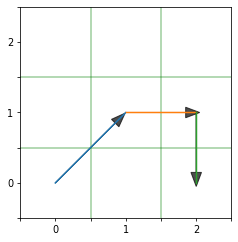

In [326]:
POINTS_SHIFT = 0.5

def get_shited_points(p):
    return [el + POINTS_SHIFT for el in p]

def draw_path(points):
    
    f, ax = draw_field()

    for idx, p in enumerate(points):
        if idx == 0:
            continue
        prev_p = points[idx - 1]
        x1, y1 = get_shited_points(prev_p)
        x2, y2 = get_shited_points(p)
        # print(x1, y1)
        # print(x2, y2)
        xdir = (x2 - x1) * 0.85
        ydir = (y2 - y1) * 0.85
        ax.plot([x1, x2], [y1, y2])
        ax.arrow(x1, y1, xdir, ydir, head_width=0.15, head_length=0.2, fc='k', ec='k', alpha=0.7)

points = [[0,0], [1, 1], [2, 1], [2, 0]]

draw_path(points)

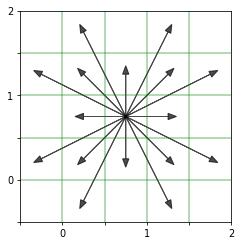

In [337]:
DIRECTIONS = {
  "UP":     [0, 1],
  "RIGHT":  [1, 0],
  "DOWN":   [0, -1],
  "LEFT":   [-1, 0],
  
  "UR":     [1, 1],
  "DR":     [1, -1],
  "DL":     [-1, -1],
  "UL":     [-1, 1],

  "UUR":    [1, 2],
  "DRR":    [2, -1],
  "DDL":    [-1,-2],
  "ULL":    [-2, 1],

  "URR":    [2, 1],
  "DDR":    [1, -2],
  "DLL":    [-2,-1],
  "UUL":    [-1, 2],
}

def draw_dirs(dirs):
    
    f, ax = draw_field(0, 0, 5)

    for name, dir in dirs.items():
        cx = 2.5
        cy = 2.5
        xdir, ydir = dir
        ax.arrow(cx, cy, xdir, ydir, head_width=0.15, head_length=0.2, fc='k', ec='k', alpha=0.7)

draw_dirs(DIRECTIONS)

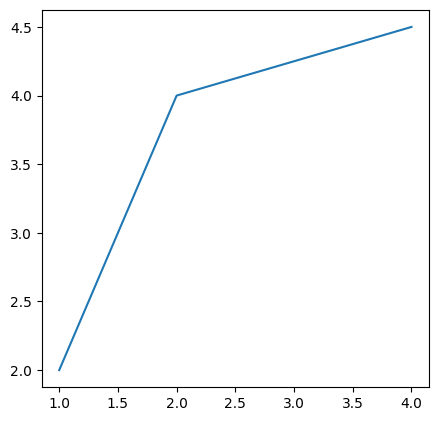

In [33]:


init_plot_size()

x = [1, 2, 4]
y = [2, 4, 4.5]

plt.plot(x, y)

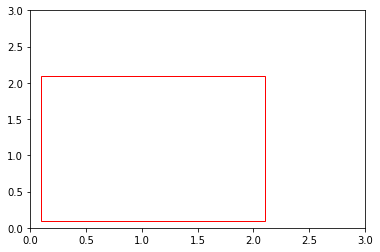

In [101]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
ax = plt.axes()
rect = patches.Rectangle((0.1, 0.1), 2, 2, linewidth=, edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.add_patch(rect)

plt.show()


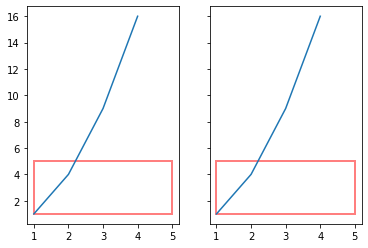

In [200]:
f, plots  = plt.subplots(1, 2, sharex='all', sharey='all')

for pl in plots:
    pl.plot([1, 2, 3, 4], [1, 4, 9, 16])
    rect = plt.Rectangle((1, 1), 4, 4, alpha=0.5, linewidth=2, edgecolor='r',facecolor='none')
    pl.add_patch(rect)